In [1]:
from DiffOperators import div2D, grad, euclidian_norm2D, heat_equation
import numpy as np
from Denoising import DenoisingTikhonov, Denoise_TV

# Denoising Tikhonov

Here were used renormed initial image and renormed resulted image

In [2]:
import matplotlib.image as img
import matplotlib.pyplot as plt
image = img.imread('Cameraman.png')
image_noisy = image+ np.sin(np.random.rand(image.shape[0],image.shape[1]))

def rnrm_img(f):
    # returns renormed image
    return (f -  np.min(f)) / (np.max(f) - np.min(f))

# Add noise to initial image.
image_noisy = rnrm_img(image+ np.sin(np.random.rand(image.shape[0],image.shape[1]))/3)

<Figure size 576x576 with 0 Axes>

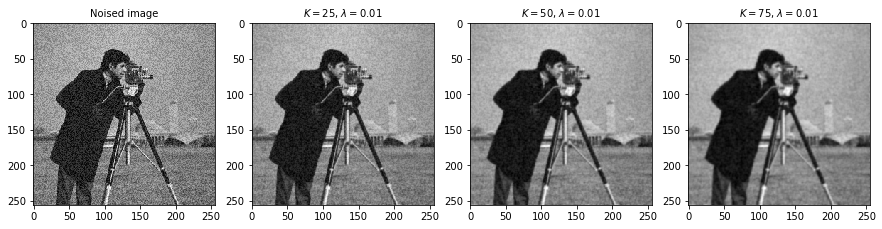

In [3]:
time_step = 0.01
k1 = 25 
lambd1 = 0.01
k2 = 50 
lambd2 = 0.01
k3 = 75 
lambd3 = 0.01
thikh_image_1 = rnrm_img(DenoisingTikhonov(image_noisy, time_step, k1, lambd1))
thikh_image_2 = rnrm_img(DenoisingTikhonov(image_noisy, time_step, k2, lambd2))
thikh_image_3 = rnrm_img(DenoisingTikhonov(image_noisy, time_step, k3, lambd3))

fs = 10
plt.figure(figsize=(8,8))
f, axarr = plt.subplots(1,4,figsize=(15,15))
axarr[0].imshow(image_noisy, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0].set_title('Noised image', fontsize=fs)
axarr[1].imshow(thikh_image_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1].set_title('$K = {}$, $\lambda={}$'.format(k1, lambd1), fontsize=fs)
axarr[2].imshow(thikh_image_2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[2].set_title('$K = {}$, $\lambda={}$'.format(k2, lambd2), fontsize=fs)
axarr[3].imshow(thikh_image_3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[3].set_title('$K = {}$, $\lambda={}$'.format(k3, lambd3), fontsize=fs)
plt.show()

<Figure size 576x576 with 0 Axes>

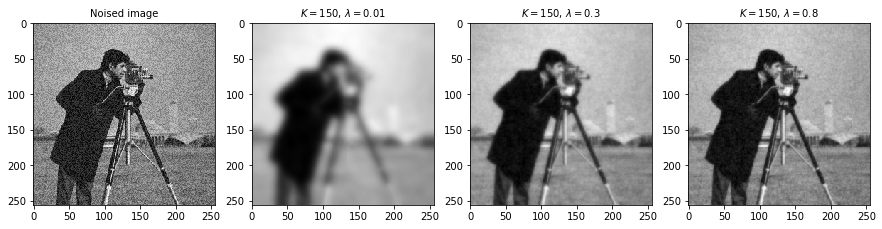

In [4]:
time_step = 1/8
k1 = 150 
lambd1 = 0.01
k2 = 150 
lambd2 = 0.3
k3 = 150 
lambd3 = 0.8
thikh_image_1 = rnrm_img(DenoisingTikhonov(image_noisy, time_step, k1, lambd1))
thikh_image_2 = rnrm_img(DenoisingTikhonov(image_noisy, time_step, k2, lambd2))
thikh_image_3 = rnrm_img(DenoisingTikhonov(image_noisy, time_step, k3, lambd3))
fs = 10
plt.figure(figsize=(8,8))
f, axarr = plt.subplots(1,4,figsize=(15,15))
axarr[0].imshow(image_noisy, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0].set_title('Noised image', fontsize=fs)
axarr[1].imshow(thikh_image_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1].set_title('$K = {}$, $\lambda={}$'.format(k1, lambd1), fontsize=fs)
axarr[2].imshow(thikh_image_2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[2].set_title('$K = {}$, $\lambda={}$'.format(k2, lambd2), fontsize=fs)
axarr[3].imshow(thikh_image_3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[3].set_title('$K = {}$, $\lambda={}$'.format(k3, lambd3), fontsize=fs)
plt.show()

# Smoothed Total Variation regularization

With fixed number of iterations.

<Figure size 576x576 with 0 Axes>

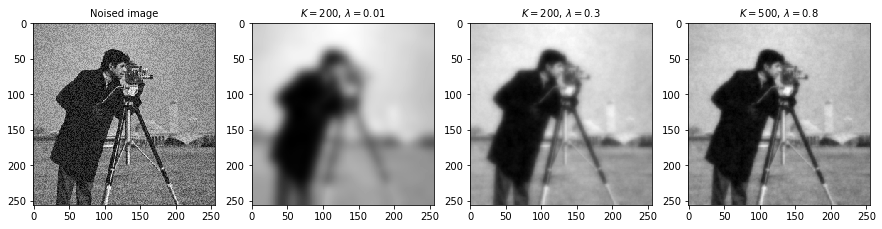

In [5]:
time_step = 0.05
k1 = 200 
lambd1 = 0.01
k2 = 200 
lambd2 = 0.3
k3 = 500 
lambd3 = 0.8
epsilon = 0.1
tv_image_1 = rnrm_img(Denoise_TV(image_noisy, time_step, k1, lambd1, epsilon))
tv_image_2 = rnrm_img(Denoise_TV(image_noisy, time_step, k2, lambd2, epsilon))
tv_image_3 = rnrm_img(Denoise_TV(image_noisy, time_step, k3, lambd3, epsilon))
fs = 10
plt.figure(figsize=(8,8))
f, axarr = plt.subplots(1,4,figsize=(15,15))
axarr[0].imshow(image_noisy, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0].set_title('Noised image', fontsize=fs)
axarr[1].imshow(tv_image_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1].set_title('$K = {}$, $\lambda={}$'.format(k1, lambd1), fontsize=fs)
axarr[2].imshow(tv_image_2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[2].set_title('$K = {}$, $\lambda={}$'.format(k2, lambd2), fontsize=fs)
axarr[3].imshow(tv_image_3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[3].set_title('$K = {}$, $\lambda={}$'.format(k3, lambd3), fontsize=fs)
plt.show()

<Figure size 576x576 with 0 Axes>

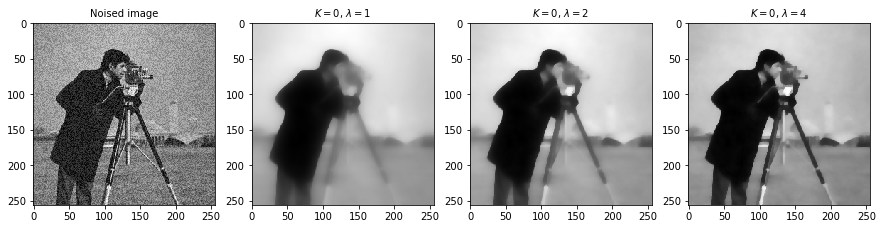

In [6]:
time_step = 0.001
k1 = 0 
lambd1 = 1
k2 = 0 
lambd2 = 2
k3 = 0 
lambd3 = 4
epsilon = 0.0001
tv_image_1 = rnrm_img(Denoise_TV(image_noisy, time_step, k1, lambd1, epsilon))
tv_image_2 = rnrm_img(Denoise_TV(image_noisy, time_step, k2, lambd2, epsilon))
tv_image_3 = rnrm_img(Denoise_TV(image_noisy, time_step, k3, lambd3, epsilon))
fs = 10
plt.figure(figsize=(8,8))
f, axarr = plt.subplots(1,4,figsize=(15,15))
axarr[0].imshow(image_noisy, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0].set_title('Noised image', fontsize=fs)
axarr[1].imshow(tv_image_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1].set_title('$K = {}$, $\lambda={}$'.format(k1, lambd1), fontsize=fs)
axarr[2].imshow(tv_image_2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[2].set_title('$K = {}$, $\lambda={}$'.format(k2, lambd2), fontsize=fs)
axarr[3].imshow(tv_image_3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[3].set_title('$K = {}$, $\lambda={}$'.format(k3, lambd3), fontsize=fs)
plt.show()

<Figure size 576x576 with 0 Axes>

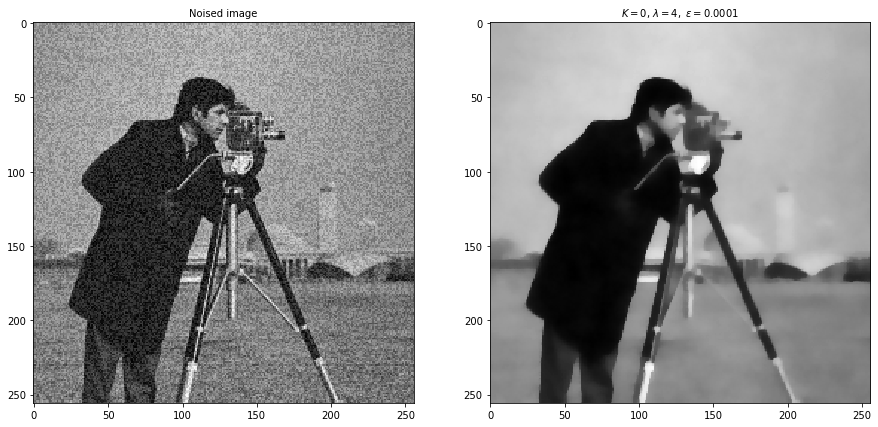

In [10]:
# example with congerged error.
time_step = 0.0001
k1 = 0 
lambd1 = 4 # regularisation parameter
epsilon = 0.0001 # kernel's parameter

tv_image_1 = rnrm_img(Denoise_TV(image_noisy, time_step, k1, lambd1, epsilon))
fs = 10
plt.figure(figsize=(8,8))
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(image_noisy, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0].set_title('Noised image', fontsize=fs)
axarr[1].imshow(tv_image_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1].set_title('$K = {}$, $\lambda={},$ $\epsilon={}$'.format(k1, lambd1, epsilon), fontsize=fs)
plt.show()